<a href="https://colab.research.google.com/github/palpitation0/Machine-Learning-homework/blob/master/11%EA%B0%95_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import tree
import pandas as pd
import numpy as np

In [0]:
titanic = pd.read_csv('https://raw.githubusercontent.com/guru99-edu/R-Programming/master/titanic_data.csv')

In [0]:
titanic.head(3)

,x,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,3,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"


In [0]:
titanic = titanic.drop(['x','name','ticket','cabin','home.dest'], axis=1)

In [0]:
titanic.head(3)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.55,S
2,1,0,female,2,1,2,151.55,S


In [0]:
titanic.pclass = titanic.pclass.replace({1:"Upper", 2:"Middle", 3:"Lower"})

In [0]:
titanic.survived = titanic.survived.replace({0:"No", 1:"Yes"})

In [0]:
titanic.head(3)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,Upper,Yes,female,29,0,0,211.3375,S
1,Upper,Yes,male,0.9167,1,2,151.55,S
2,Upper,No,female,2,1,2,151.55,S


In [0]:
titanic.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [0]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
pclass      1309 non-null object
survived    1309 non-null object
sex         1309 non-null object
age         1309 non-null object
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1309 non-null object
embarked    1309 non-null object
dtypes: int64(2), object(6)
memory usage: 81.9+ KB


In [0]:
titanic['pclass'] = titanic['pclass'].astype('category')
titanic['survived'] = titanic['survived'].astype('category')

In [106]:
titanic.pclass.dtypes

CategoricalDtype(categories=['Lower', 'Middle', 'Upper'], ordered=False)

In [0]:
X = titanic.drop(["survived"], axis=1)
y = titanic["survived"]
X_one_hot = pd.get_dummies(X, drop_first=True)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.25, random_state=0)

In [0]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

model = tree.fit(X_train, y_train)

In [0]:
import graphviz
import sklearn

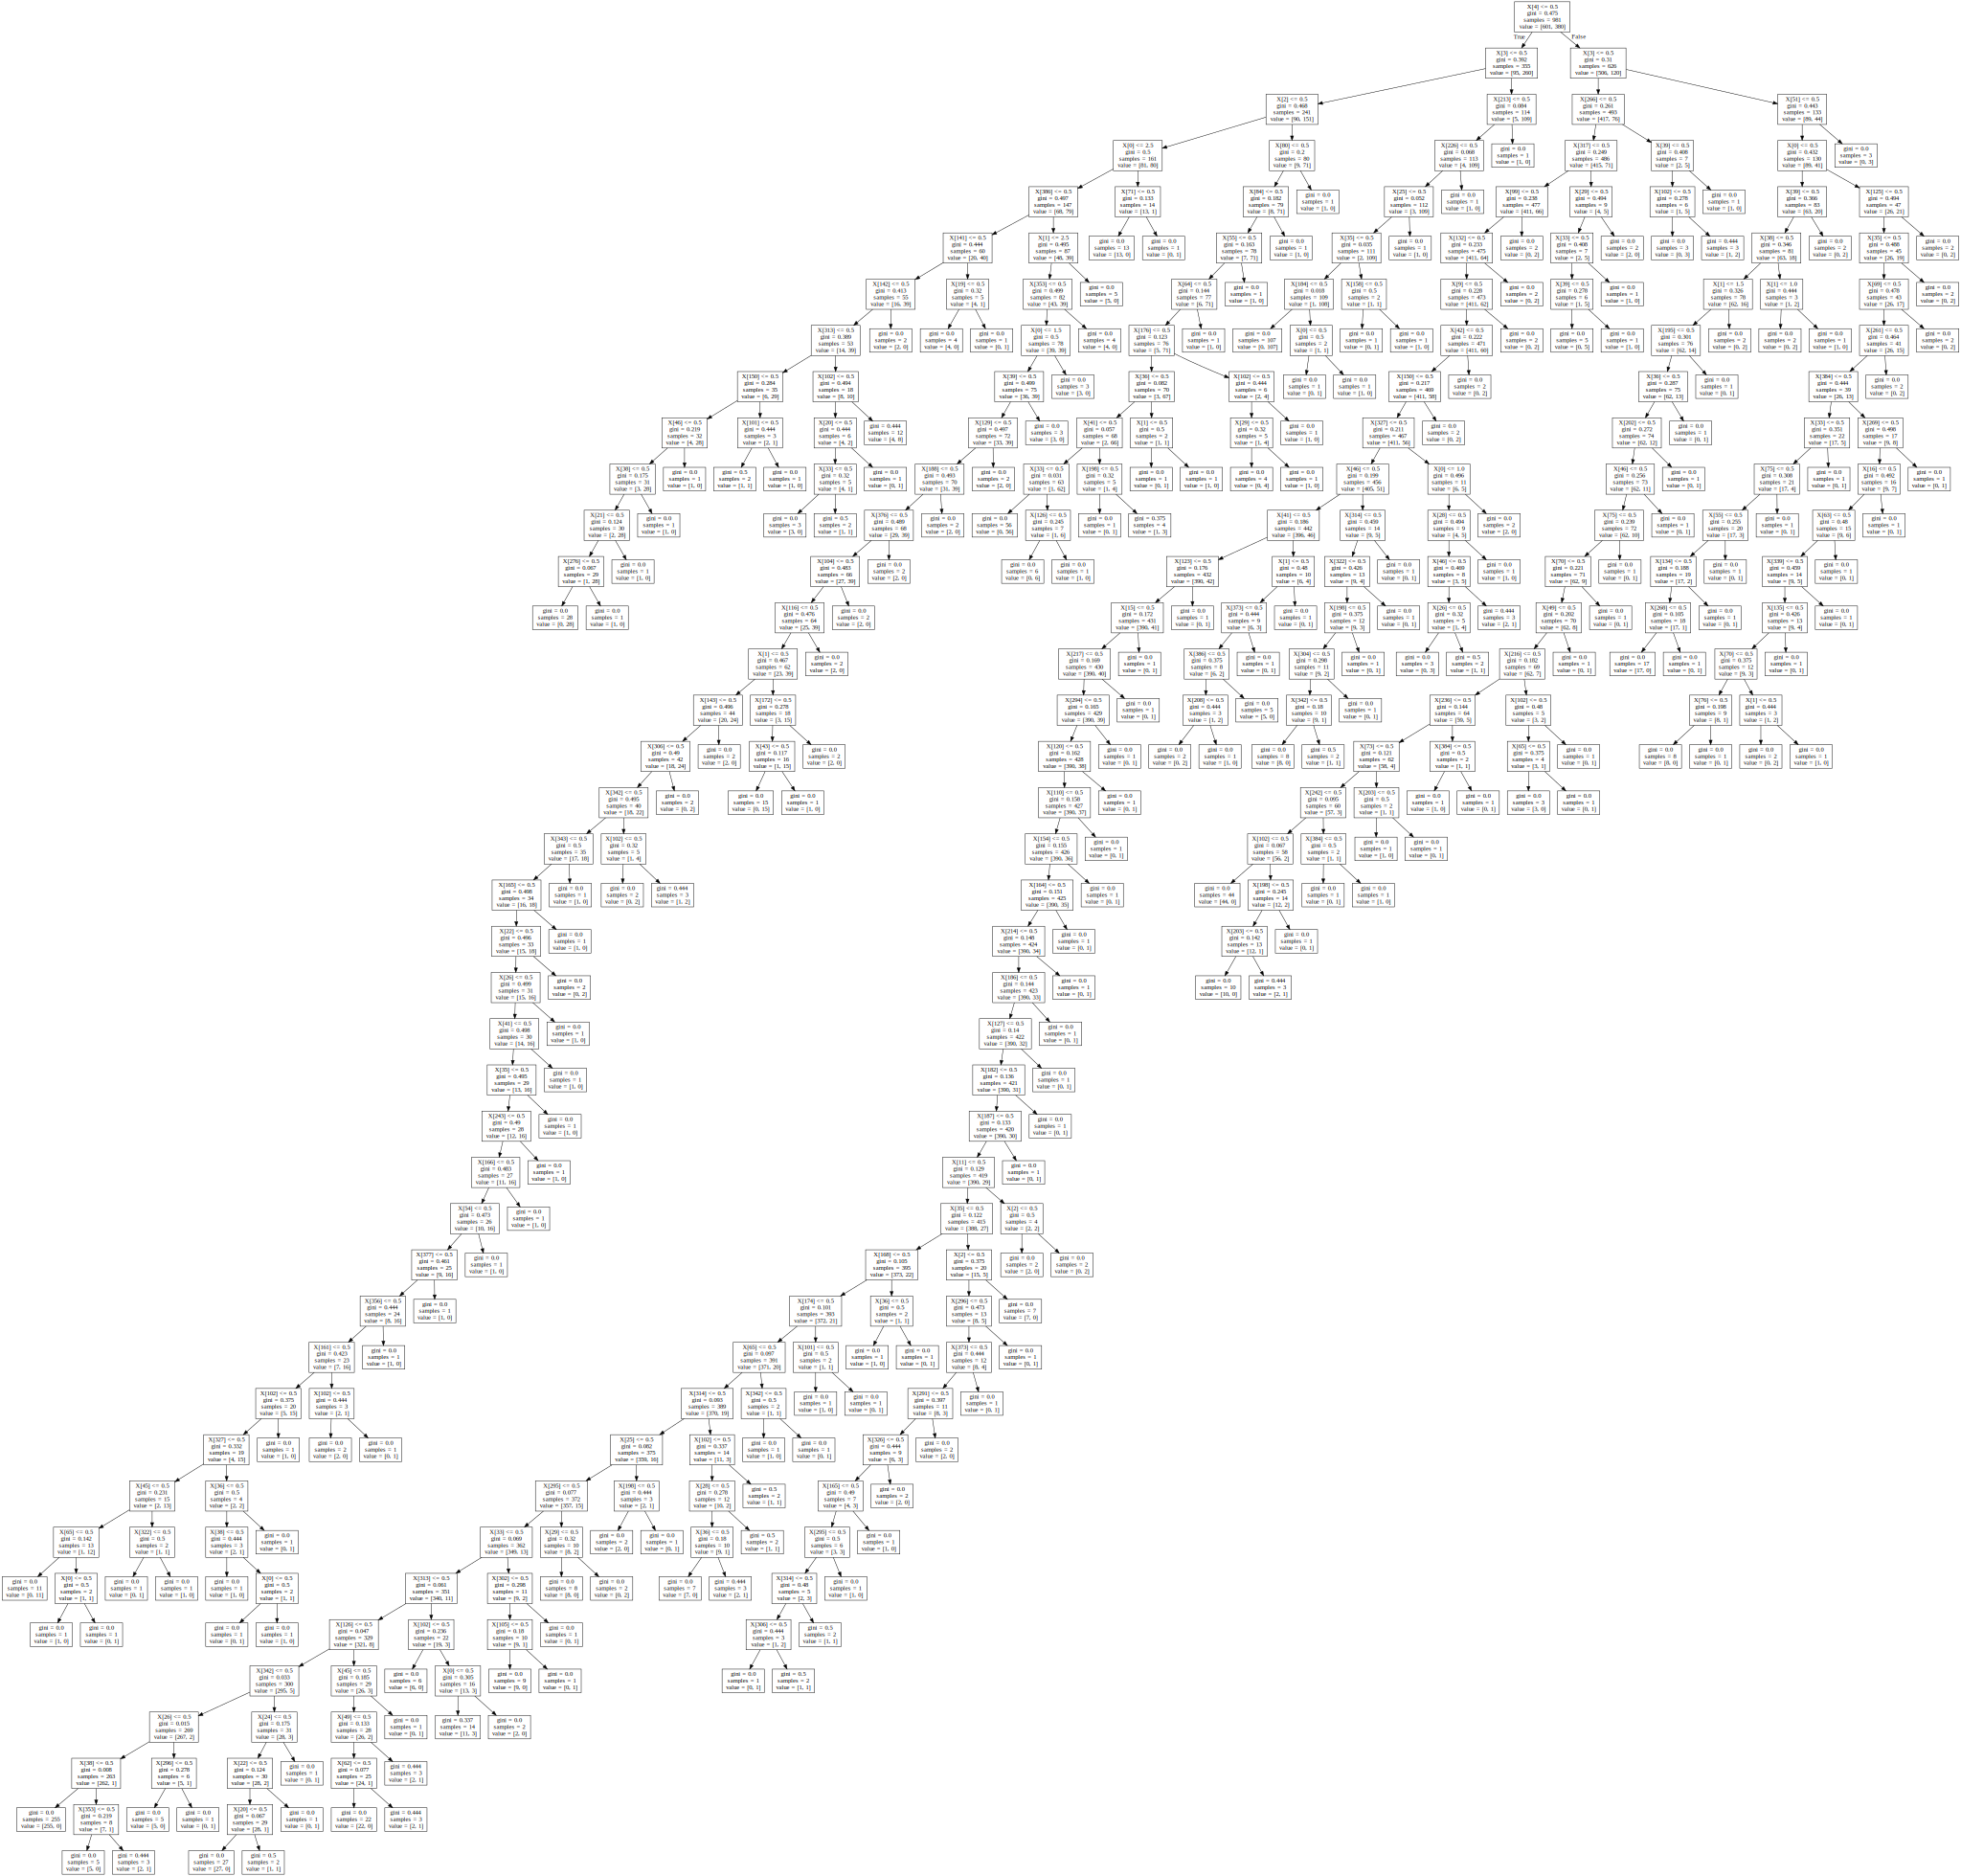

In [0]:
dot_data = sklearn.tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [0]:
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [103]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.77


In [104]:
sklearn.metrics.confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)

array([[173,  35],
       [ 41,  79]])

In [108]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print(tree_model)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


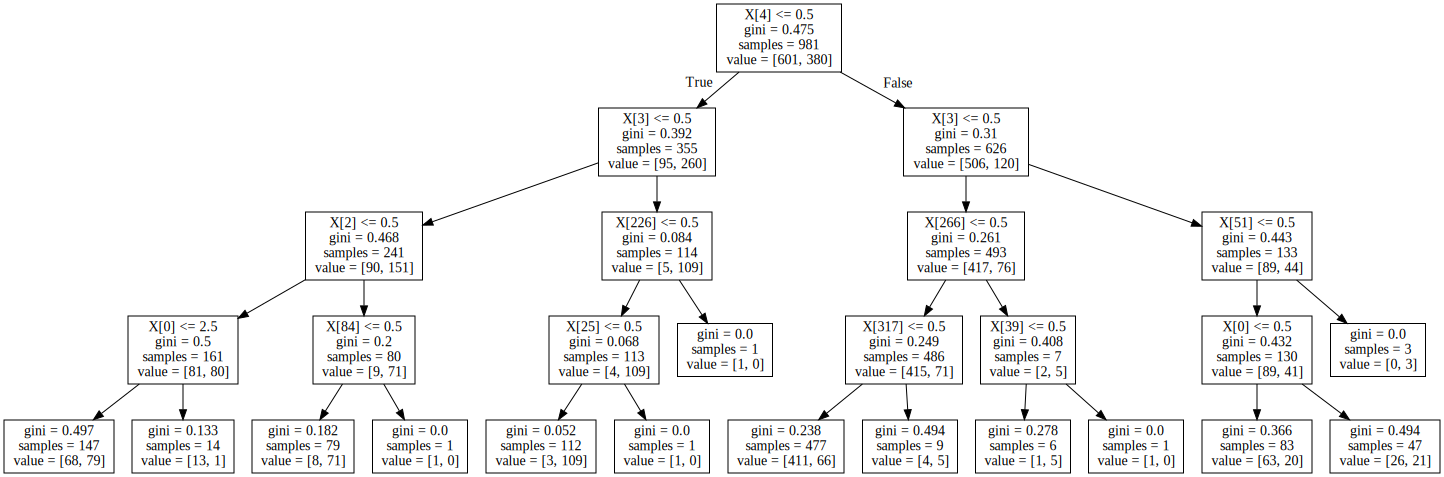

In [109]:
dot_data = sklearn.tree.export_graphviz(tree_model, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [110]:
y_pred = tree_model.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.79
